<a href="https://colab.research.google.com/github/saurabhsingh1411/10_simple_project_data_science/blob/main/sales%20forcasting/Copy_of_big_mart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Lib and files


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

In [2]:
test=pd.read_csv('Test.csv')
train=pd.read_csv('Train.csv')

In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

# preprocessing

In [7]:
data=pd.concat([train,test],ignore_index=True)

data.tail(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [9]:
data['Item_Weight'].fillna(value=data['Item_Weight'].mean(),inplace=True)   #itemweight

In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [11]:
data['Outlet_Size']=data['Outlet_Size'].map({'Small':1,'Medium':2,'High':3})  #category

In [12]:
data['Outlet_Size'].value_counts()

2.0    4655
1.0    3980
3.0    1553
Name: Outlet_Size, dtype: int64

In [13]:
data['Outlet_Size'].fillna(value=data['Outlet_Size'].mean(),inplace=True)

In [14]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [15]:
categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]=='object']

print(categorical_columns)
print(len(categorical_columns))

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
6


In [16]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,1.000000,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,2.000000,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,1.761779,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,1.761779,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,1.761779,Tier 2,Supermarket Type1,NaN


In [17]:
categorical_columns =[x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]

In [18]:
categorical_columns

['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']

In [19]:
for x in categorical_columns:
  print("\n \n frequency of %s"%x)
  print(data[x].value_counts())


 
 frequency of Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

 
 frequency of Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

 
 frequency of Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

 
 frequency of Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


In [20]:
data['Item_type_combined']=data['Item_Identifier'].apply(lambda x:x[0:2])

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_type_combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.000000,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.000000,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.000000,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.761779,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.000000,Tier 3,Supermarket Type1,994.7052,NC


In [21]:
data['Item_type_combined']=data['Item_type_combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

data['Item_Fat_Content']=data['Item_Fat_Content'].map({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat','Regular':'Regular','Low Fat':'Low Fat'})

In [22]:
data['Item_Fat_Content'].value_counts().sum()

14204

In [23]:
data.drop(['Item_Type','Outlet_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Size'],axis=1 ,inplace=True)

In [24]:
le=LabelEncoder()

data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])
data['Item_type_combined']=le.fit_transform(data['Item_type_combined'])
data['Item_Identifier']=le.fit_transform(data['Item_Identifier'])



In [25]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_type_combined
14199,233,10.5,1,0.013496,141.3154,NaN,1
14200,308,7.6,1,0.142991,169.1448,NaN,1
14201,1426,10.0,0,0.073529,118.7440,NaN,2
14202,521,15.3,1,0.000000,214.6218,NaN,1
14203,997,9.5,1,0.104720,79.7960,NaN,1


In [26]:
corr=data.corr()
corr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_type_combined
Item_Identifier,1.000000,0.047101,-0.111079,-0.040775,0.010743,0.002869,0.787827
Item_Weight,0.047101,1.000000,-0.030101,-0.013641,0.033002,0.011083,0.062660
Item_Fat_Content,-0.111079,-0.030101,1.000000,0.044274,-0.004019,0.018719,-0.167227
Item_Visibility,-0.040775,-0.013641,0.044274,1.000000,-0.006351,-0.128625,-0.049641
Item_MRP,0.010743,0.033002,-0.004019,-0.006351,1.000000,0.567574,0.030219
Item_Outlet_Sales,0.002869,0.011083,0.018719,-0.128625,0.567574,1.000000,0.011236
Item_type_combined,0.787827,0.062660,-0.167227,-0.049641,0.030219,0.011236,1.000000


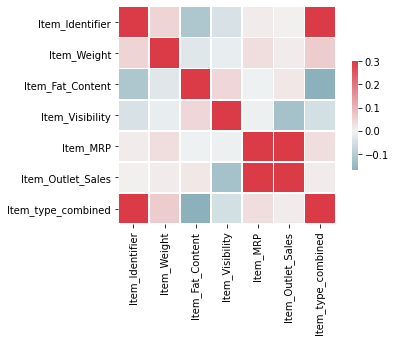

In [27]:
mask=np.zeros_like(corr,dtype=np.bool)

cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_type_combined
14199,233,10.5,1,0.013496,141.3154,NaN,1
14200,308,7.6,1,0.142991,169.1448,NaN,1
14201,1426,10.0,0,0.073529,118.7440,NaN,2
14202,521,15.3,1,0.000000,214.6218,NaN,1
14203,997,9.5,1,0.104720,79.7960,NaN,1


## Without PCA 

In [29]:
data.isnull().sum()

Item_Identifier          0
Item_Weight              0
Item_Fat_Content         0
Item_Visibility          0
Item_MRP                 0
Item_Outlet_Sales     5681
Item_type_combined       0
dtype: int64

In [30]:
data['Item_Outlet_Sales'].fillna(value='test',inplace=True)

In [31]:
data.isnull().sum()

Item_Identifier       0
Item_Weight           0
Item_Fat_Content      0
Item_Visibility       0
Item_MRP              0
Item_Outlet_Sales     0
Item_type_combined    0
dtype: int64

In [49]:
test_data=data[data['Item_Outlet_Sales']=='test']

In [50]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_type_combined
8523,1114,20.750000,0,0.007565,107.8622,test,1
8524,1078,8.300000,1,0.038428,87.3198,test,1
8525,1420,14.600000,0,0.099575,241.7538,test,2
8526,817,7.315000,0,0.015388,155.0340,test,1
8527,1197,12.792854,1,0.118599,234.2300,test,1


In [51]:
train_data=data[data['Item_Outlet_Sales']!='test']
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_type_combined
0,156,9.30,0,0.016047,249.8092,3735.14,1
1,8,5.92,1,0.019278,48.2692,443.423,0
2,662,17.50,0,0.016760,141.6180,2097.27,1
3,1121,19.20,1,0.000000,182.0950,732.38,1
4,1297,8.93,0,0.000000,53.8614,994.705,2


In [52]:
print(train_data.shape)
print(test_data.shape)
print(data.shape)

(8523, 7)
(5681, 7)
(14204, 7)


In [54]:
y_train=train_data['Item_Outlet_Sales']
y_train

0       3735.14
1       443.423
2       2097.27
3        732.38
4       994.705
         ...   
8518    2778.38
8519    549.285
8520    1193.11
8521     1845.6
8522     765.67
Name: Item_Outlet_Sales, Length: 8523, dtype: object

In [57]:
train_data.drop('Item_Outlet_Sales',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
X_train=train_data
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_type_combined
0,156,9.30,0,0.016047,249.8092,1
1,8,5.92,1,0.019278,48.2692,0
2,662,17.50,0,0.016760,141.6180,1
3,1121,19.20,1,0.000000,182.0950,1
4,1297,8.93,0,0.000000,53.8614,2


In [64]:
test_data.drop('Item_Outlet_Sales',axis=1,inplace=True)
test_data

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_type_combined
8523,1114,20.750000,0,0.007565,107.8622,1
8524,1078,8.300000,1,0.038428,87.3198,1
8525,1420,14.600000,0,0.099575,241.7538,2
8526,817,7.315000,0,0.015388,155.0340,1
8527,1197,12.792854,1,0.118599,234.2300,1
...,...,...,...,...,...,...
14199,233,10.500000,1,0.013496,141.3154,1
14200,308,7.600000,1,0.142991,169.1448,1
14201,1426,10.000000,0,0.073529,118.7440,2
14202,521,15.300000,1,0.000000,214.6218,1


In [65]:
X_test=test_data
X_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_type_combined
8523,1114,20.750000,0,0.007565,107.8622,1
8524,1078,8.300000,1,0.038428,87.3198,1
8525,1420,14.600000,0,0.099575,241.7538,2
8526,817,7.315000,0,0.015388,155.0340,1
8527,1197,12.792854,1,0.118599,234.2300,1


## Fitting the model

In [61]:
lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_pred=lr.predict(X_test)

In [67]:
y_pred

array([1887.94370146, 1525.11639686, 3553.36544793, ..., 1757.91574507,
       3651.30561976, 1121.86124648])